C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Dataset Shape: (20, 3)
Training Set Shape: (14, 3)
Testing Set Shape: (6, 3)
Trained Model: CategoricalNB()
Confusion Matrix:
 [[5 1]
 [0 0]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.83      0.91         6
        True       0.00      0.00      0.00         0

    accuracy                           0.83         6
   macro avg       0.50      0.42      0.45         6
weighted avg       1.00      0.83      0.91         6



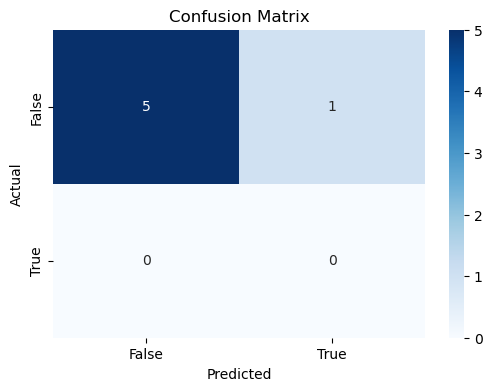

Predicted Fraudulent Status: ['False']


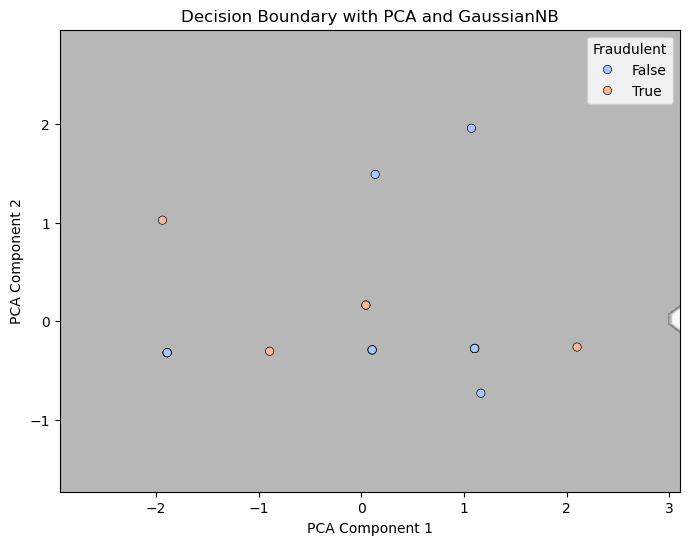

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB, GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("bayes.csv")

# Drop completely empty columns and rows
df_cleaned = df.dropna(how='all', axis=1).dropna(how='all', axis=0)
df_cleaned.reset_index(drop=True, inplace=True)

# Ensure column names are stripped of any leading/trailing spaces
df_cleaned.columns = df_cleaned.columns.str.strip()

# Rename columns correctly based on expected structure
df_cleaned.columns = ['Credit History', 'Guarantor/CoApplicant', 'Accomodation', 'Fraudulent']

# Define features and target variable
X = df_cleaned.drop(columns=['Fraudulent'])  # 'Fraudulent' is the target column
Y = df_cleaned['Fraudulent']

# Encode categorical features
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
Y = target_encoder.fit_transform(Y.astype(str))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train Naïve Bayes model
model = CategoricalNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

# Display outputs
print("Dataset Shape:", X.shape)
print("Training Set Shape:", X_train.shape)
print("Testing Set Shape:", X_test.shape)
print("Trained Model:", model)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True)#, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Example new data prediction
new_data = pd.DataFrame({
    'Credit History': ['paid'],
    'Guarantor/CoApplicant': ['none'],
    'Accomodation': ['rent']
})

# Encode new data
for col in new_data.columns:
    if col in label_encoders:
        new_data[col] = new_data[col].map(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

# Predict new data
predicted_encoded = model.predict(new_data)
predicted_label = target_encoder.inverse_transform(predicted_encoded)
print("Predicted Fraudulent Status:", predicted_label)

# Decision Boundary Plot using PCA and GaussianNB
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

nb = GaussianNB()
nb.fit(X_pca, Y)

# Generate grid for decision boundary
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = nb.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='gray')
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned['Fraudulent'], palette='coolwarm', edgecolor='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Decision Boundary with PCA and GaussianNB')
plt.show()

In [3]:
df=pd.read_csv("bayes.csv")
df

,CreditHistory,Guarantor,Accomodation,Fraud
0,current,none,own,True
1,paid,none,own,False
2,paid,none,own,False
3,paid,guarantor,rent,True
4,arrears,none,own,False
5,arrears,none,own,True
6,current,none,own,False
7,arrears,none,own,False
8,current,none,rent,False
9,none,none,own,True


In [5]:
df.isnull().sum()

CreditHistory    0
Guarantor        0
Accomodation     0
Fraud            0
dtype: int64

In [7]:
df.dtypes

CreditHistory    object
Guarantor        object
Accomodation     object
Fraud              bool
dtype: object

In [9]:
df.describe()

,CreditHistory,Guarantor,Accomodation,Fraud
count,20,20,20,20
unique,5,3,3,2
top,arrears,none,own,False
freq,7,17,15,14


C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\sande\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
 [[5 1]
 [0 0]]
Classification Report:
               precision    recall  f1-score   support

       False       1.00      0.83      0.91         6
        True       0.00      0.00      0.00         0

    accuracy                           0.83         6
   macro avg       0.50      0.42      0.45         6
weighted avg       1.00      0.83      0.91         6

Predicted Fraudulent Status: ['False']


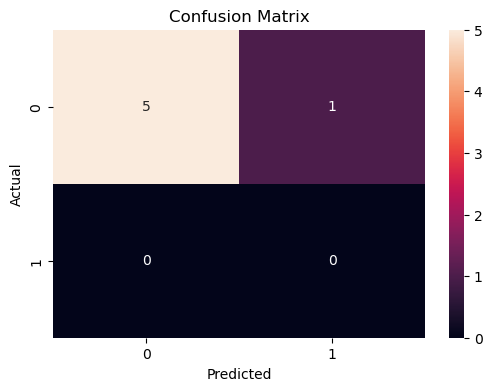

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import confusion_matrix, classification_report

# Load the dataset
df = pd.read_csv("bayes.csv")

# Drop completely empty columns and rows
df_cleaned = df.dropna(how='all', axis=1).dropna(how='all', axis=0)
df_cleaned.reset_index(drop=True, inplace=True)

# Ensure column names are stripped of any leading/trailing spaces
df_cleaned.columns = df_cleaned.columns.str.strip()

# Rename columns correctly based on expected structure
df_cleaned.columns = ['Credit History', 'Guarantor/CoApplicant', 'Accomodation', 'Fraudulent']

# Define features and target variable
X = df_cleaned.drop(columns=['Fraudulent'])  # 'Fraudulent' is the target column
Y = df_cleaned['Fraudulent']

# Encode categorical features
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col].astype(str))  # Convert to string before encoding
    label_encoders[col] = le

# Encode target variable
target_encoder = LabelEncoder()
Y = target_encoder.fit_transform(Y.astype(str))

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# Train Naïve Bayes model
model = CategoricalNB()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Compute classification report
report = classification_report(y_test, y_pred, target_names=target_encoder.classes_)

# Display outputs
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)
# Example new data prediction
new_data = pd.DataFrame({
    'Credit History': ['paid'],
    'Guarantor/CoApplicant': ['none'],
    'Accomodation': ['rent']
})

# Encode new data
for col in new_data.columns:
    if col in label_encoders:
        new_data[col] = new_data[col].map(lambda x: label_encoders[col].transform([x])[0] if x in label_encoders[col].classes_ else -1)

# Predict new data
predicted_encoded = model.predict(new_data)
predicted_label = target_encoder.inverse_transform(predicted_encoded)
print("Predicted Fraudulent Status:", predicted_label)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True)#, fmt='d', cmap='Blues', xticklabels=target_encoder.classes_, yticklabels=target_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
